In [138]:
import pandas as pd


# Read the CSV files
arabic_results = pd.read_csv("data/survey_results_arabic.csv")
turkish_results = pd.read_csv("data/survey_results_turkish.csv")

# Merge the dataframes
merged_results = pd.concat([arabic_results, turkish_results])

# Save the merged dataframe to a new CSV file
merged_results.to_csv("data/merged_survey_results.csv", index=False)


# Remove specified columns (classical answers) from the merged dataframe
columns_to_remove = merged_results.columns[
    29:47
]  # Adjusted to Python's 0-indexing and exclusive end
merged_results.drop(columns_to_remove, axis=1, inplace=True)

# Custom mappings for each column
mappings = {
    '1': {'Erkek': 0, 'Kadın': 1},  # Assuming '1' is the column index for gender
    '2': {'15-30': 0, '10-15': 1, '30-50': 2, '50+': 3},  # Age groups
    '3': {'0-2': 0, '2-5': 1, '10+': 2, '5-10': 3},  # Experience years
    '5': {'Okula Gitmedim': 0, 'İlkokul': 1, 'Lise': 2, 'Üniversite': 3},  # Education
    '6': {'Evet': 0, 'Hayır': 1},  # Working status
    '7': {'Evli': 0, 'Bekar': 1, 'Dul': 2},  # Marital status
    '8': {'Türkiye\'den Gitmek': 0, 'Türkiye\'de Kalmak': 1},  # Future plans
    '9': {'Suriye': 0, 'Türkiye': 1, 'Avrupa Ülkesi': 2, 'Ortadoğu Ülkesi': 3},  # Country preference
}

# Apply the mappings to each column
for column, mapping in mappings.items():
    merged_results[column] = merged_results[column].map(mapping)

# Drop the column which shows the index
merged_results.drop(merged_results.columns[0], axis=1, inplace=True)
merged_results

,1,2,3,4,5,6,7,8,9,10,...,47,48,49,50,51,52,53,54,55,56
0,1,2.0,2.0,1.0,3.0,1,0,1,1.0,3,...,3.0,4.0,3.0,1.0,4.0,4.0,5.0,5.0,3.0,3.0
1,1,2.0,3.0,4.0,1.0,1,0,1,1.0,5,...,2.0,1.0,1.0,3.0,1.0,1.0,3.0,1.0,5.0,5.0
2,1,2.0,3.0,3.0,1.0,1,0,1,2.0,5,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,1,0.0,3.0,5.0,2.0,1,0,1,1.0,3,...,4.0,3.0,5.0,3.0,2.0,1.0,5.0,3.0,3.0,2.0
4,0,2.0,3.0,1.0,2.0,0,0,1,1.0,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,1,2.0,3.0,3.0,1.0,1,1,1,1.0,3,...,3.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,2.0,4.0
41,1,1.0,3.0,5.0,1.0,1,1,1,1.0,5,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
42,1,1.0,3.0,4.0,1.0,1,1,1,1.0,5,...,3.0,2.0,NaN,5.0,4.0,2.0,4.0,4.0,4.0,4.0
43,1,2.0,3.0,5.0,2.0,1,0,1,1.0,5,...,2.0,1.0,3.0,1.0,2.0,1.0,4.0,3.0,1.0,5.0


In [139]:
column_labels = {
    "1": {"0": "Men (Erkek)", "1": "Women (Kadın)"},
    "2": {"0": "15-30", "1": "10-15", "2": "30-50", "3": "50+"},
    "3": {"0": "0-2", "1": "2-5", "2": "10+", "3": "5-10"},
    "4": {"1": "Çok Kötü", "2": "Kötü", "3": "Orta", "4": "İyi", "5": "Çok İyi"},
    "5": {"0": "Did not attend school (Okula Gitmedim)", "1": "Primary school (İlkokul)", "2": "High school (Lise)", "3": "University (Üniversite)"},
    "6": {"0": "Yes (Evet)", "1": "No (Hayır)"},
    "7": {"0": "Married (Evli)", "1": "Single (Bekar)", "2": "Widowed (Dul)"},
    "8": {"0": "Leave Turkey (Türkiye'den Gitmek)", "1": "Stay in Turkey (Türkiye'de Kalmak)"},
    "9": {"0": "Syria (Suriye)", "1": "Turkey (Türkiye)", "2": "A European country (Avrupa Ülkesi)", "3": "A Middle Eastern country (Ortadoğu Ülkesi)"}
}

for column, labels in column_labels.items():
    counts = merged_results[column].value_counts()
    percentages = counts / counts.sum() * 100

    for key, label in labels.items():
        print(f"Number of {label}: {counts.get(int(key), 0)}, Percentage: {round(percentages.get(int(key), 0), 2)}%")



Number of Men (Erkek): 28, Percentage: 34.15%
Number of Women (Kadın): 54, Percentage: 65.85%
Number of 15-30: 15, Percentage: 18.52%
Number of 10-15: 23, Percentage: 28.4%
Number of 30-50: 35, Percentage: 43.21%
Number of 50+: 8, Percentage: 9.88%
Number of 0-2: 2, Percentage: 2.53%
Number of 2-5: 1, Percentage: 1.27%
Number of 10+: 28, Percentage: 35.44%
Number of 5-10: 48, Percentage: 60.76%
Number of Çok Kötü: 6, Percentage: 7.41%
Number of Kötü: 10, Percentage: 12.35%
Number of Orta: 18, Percentage: 22.22%
Number of İyi: 21, Percentage: 25.93%
Number of Çok İyi: 26, Percentage: 32.1%
Number of Did not attend school (Okula Gitmedim): 11, Percentage: 13.92%
Number of Primary school (İlkokul): 28, Percentage: 35.44%
Number of High school (Lise): 35, Percentage: 44.3%
Number of University (Üniversite): 5, Percentage: 6.33%
Number of Yes (Evet): 17, Percentage: 20.73%
Number of No (Hayır): 65, Percentage: 79.27%
Number of Married (Evli): 47, Percentage: 57.32%
Number of Single (Bekar):

In [140]:
from scipy.stats import chi2_contingency


# Create a contingency table for two categorical variables
for i in range(1, 10):
    for j in range(i+1, 10):
        contingency_table = pd.crosstab(merged_results[str(i)], merged_results[str(j)])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        print(f"Chi-Square Statistic for columns {i} and {j}: {chi2}, p-value: {p}")


Chi-Square Statistic for columns 1 and 2: 0.8003105590062113, p-value: 0.8493927503261134
Chi-Square Statistic for columns 1 and 3: 2.1399455615579566, p-value: 0.5438738693589851
Chi-Square Statistic for columns 1 and 4: 4.863214952163739, p-value: 0.3016226118237875
Chi-Square Statistic for columns 1 and 5: 1.1713079373456727, p-value: 0.7598937548032317
Chi-Square Statistic for columns 1 and 6: 19.54152720917427, p-value: 9.843635084381233e-06
Chi-Square Statistic for columns 1 and 7: 0.5394048557169129, p-value: 0.7636066886094601
Chi-Square Statistic for columns 1 and 8: 0.1550154320987654, p-value: 0.6937877796511591
Chi-Square Statistic for columns 1 and 9: 1.8925287236482684, p-value: 0.3881884498332749
Chi-Square Statistic for columns 2 and 3: 4.509199134199134, p-value: 0.6081124554946671
Chi-Square Statistic for columns 2 and 4: 21.955581340674513, p-value: 0.03802066685392022
Chi-Square Statistic for columns 2 and 5: 9.739179601592703, p-value: 0.37200989530970535
Chi-Squar

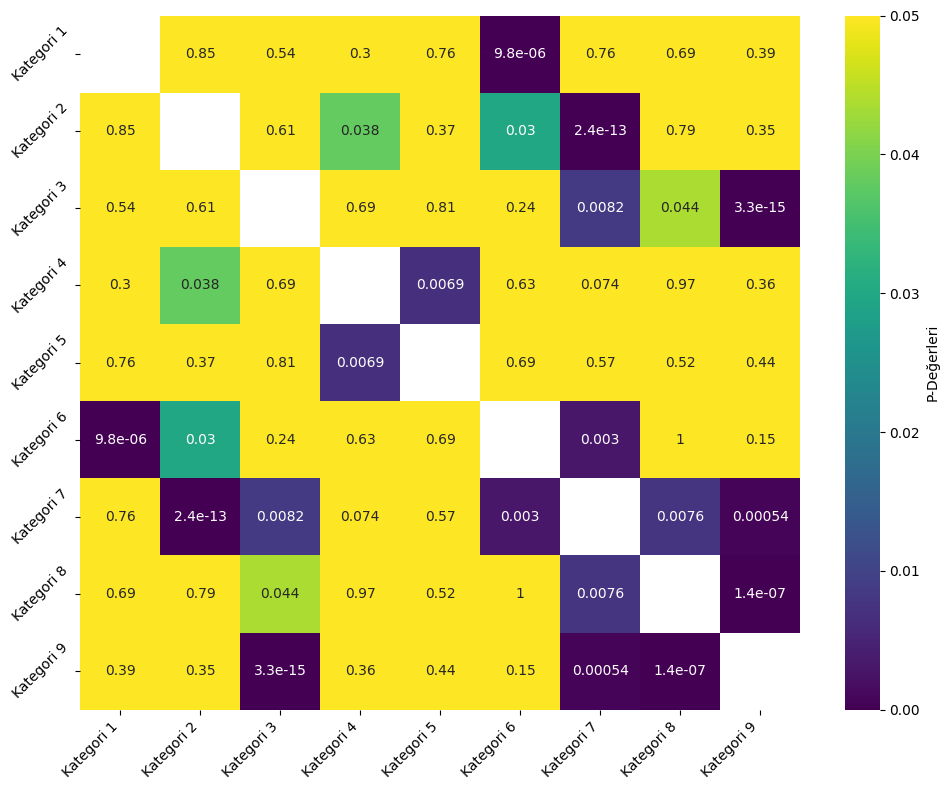

In [141]:
import numpy as np

# Adjust the size of the matrix to accommodate 9 columns, starting from "1" to "9"
p_values_matrix = np.full((10, 10), np.nan)  # Adjusted to 10x10 to include columns 1 through 9

# Populate the matrix with p-values
for i in range(1, 10):  # Adjusted to start from 1 to 9
    for j in range(i+1, 10):  # Ensure j > i and goes up to 9
        # Use the actual column labels as strings for correct indexing
        contingency_table = pd.crosstab(merged_results[str(i)], merged_results[str(j)])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        p_values_matrix[i, j] = p
        p_values_matrix[j, i] = p  # Symmetric matrix

# Convert the matrix into a DataFrame for easier handling
# Adjusted column and index labels to correctly reflect the actual columns "1" through "9"
p_values_df = pd.DataFrame(p_values_matrix[1:, 1:],  # Exclude the first row and column to match the actual columns
                           columns=[f"Kategori {i}" for i in range(1, 10)], 
                           index=[f"Kategori {i}" for i in range(1, 10)])

import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(p_values_df, annot=True, fmt=".2g", cmap='viridis', 
            cbar_kws={'label': 'P-Değerleri'}, vmin=0, vmax=0.05)

# Adjust the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Here's a summary of the key findings from the Chi-Square tests, reflecting the significant and insignificant correlations among the survey data columns, along with demographic distributions:

- **Demographic Distributions:**
  - Gender: 34.15% Men (Erkek), 65.85% Women (Kadın)
  - Age Groups: 18.52% are 15-30, 28.4% are 10-15, 43.21% are 30-50, and 9.88% are 50+
  - Experience Years: 2.53% have 0-2 years, 1.27% have 2-5 years, 35.44% have 10+ years, and 60.76% have 5-10 years
  - Education: 13.92% Did not attend school (Okula Gitmedim), 35.44% Primary school (İlkokul), 44.3% High school (Lise), 6.33% University (Üniversite)
  - Binary Choice (Yes/No): 20.73% Yes (Evet), 79.27% No (Hayır)
  - Marital Status: 57.32% Married (Evli), 36.59% Single (Bekar), 6.1% Widowed (Dul)
  - Future Plans: 14.63% Leave Turkey (Türkiye'den Gitmek), 85.37% Stay in Turkey (Türkiye'de Kalmak)
  - Country Preference: 0% Syria (Suriye), 77.5% Turkey (Türkiye), 21.25% A European country (Avrupa Ülkesi), 1.25% A Middle Eastern country (Ortadoğu Ülkesi)

- **Significant Correlations (p < 0.05):**
  - A very strong association between gender and working status with a p-value of 9.843635084381233e-06.
  - Significant relationships between age groups and various factors including working status (p-value = 0.029710057668996624), marital status (p-value = 2.369673381736695e-13), and future plans (Leave/Stay in Turkey) with a p-value of 3.3388679559112532e-15.
  - Education and working status show a significant association with a p-value of 0.003042495598401695.
  - Marital status and future plans have a very strong association with a p-value of 1.3733115570837355e-07.

- **Insignificant Correlations (p >= 0.05):**
  - The analysis revealed several pairs of columns that do not show a statistically significant association, including but not limited to Columns 1 and 2, Columns 1 and 4, Columns 2 and 5, Columns 3 and 4, Columns 4 and 6, Columns 5 and 6, and others with p-values above the typical alpha level of 0.05.

This summary reflects the updated Chi-Square statistics and p-values, highlighting the significant and insignificant correlations between different survey questions based on the respondents' answers.

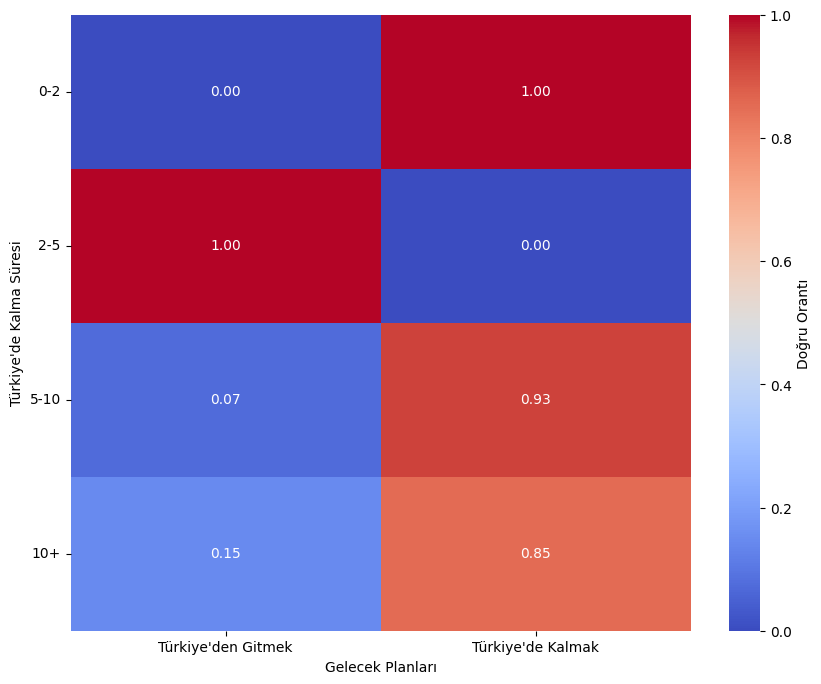

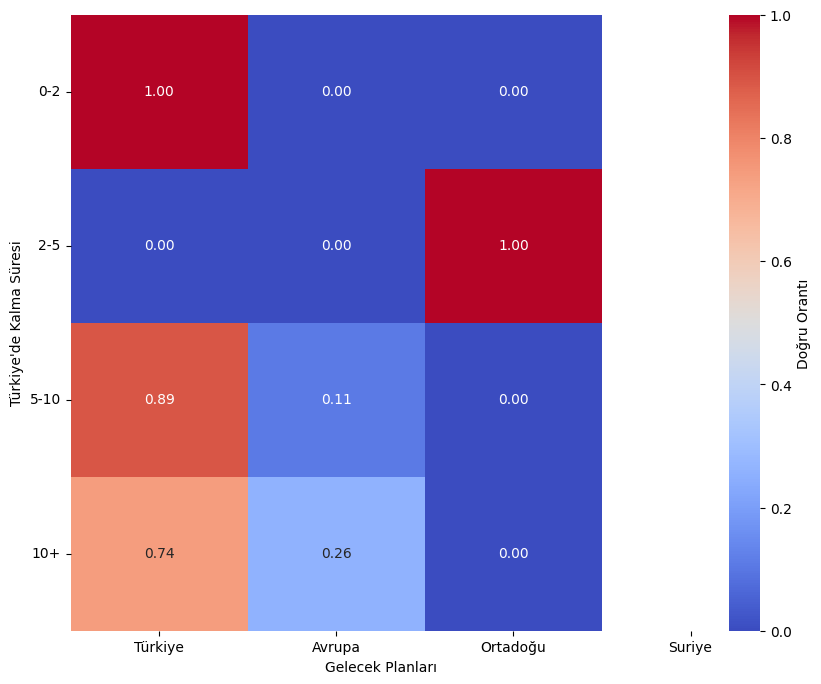

In [142]:
contingency_table_3_8_normalized = pd.crosstab(merged_results['3'], merged_results['8'], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table_3_8_normalized, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Doğru Orantı'})
plt.xlabel('Gelecek Planları')
plt.ylabel('Türkiye\'de Kalma Süresi')
plt.xticks([0.5, 1.5], ['Türkiye\'den Gitmek', 'Türkiye\'de Kalmak'])
plt.yticks([0.5, 1.5, 2.5, 3.5], ['0-2', '2-5', '5-10', '10+'], rotation=0)
plt.show()


contingency_table_3_9_normalized = pd.crosstab(merged_results['3'], merged_results['9'], normalize='index')
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table_3_9_normalized, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Doğru Orantı'})
plt.xlabel('Gelecek Planları')
plt.ylabel('Türkiye\'de Kalma Süresi')
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Türkiye', 'Avrupa', 'Ortadoğu', 'Suriye'], rotation=0)
plt.yticks([0.5, 1.5, 2.5, 3.5], ['0-2', '2-5', '5-10', '10+'], rotation=0)
plt.show()

In [143]:
# Define the labels for each question from 10 to 28
question_labels = {
    "10": "Türkiye’deki sağlık hizmetlerine erişiminiz nasıl?",
    "11": "Türk vatandaşlarıyla olan ilişkileriniz nasıl?",
    "12": "Türkiye'deki Suriyelilerle olan ilişkileriniz nasıl?",
    "13": "Türkiye'deki sosyal hayata katılımınız nasıl?",
    "14": "Türkiye'deki çalışma koşullarınızı nasıl değerlendiriyorsunuz?",
    "15": "Türkiye'deki eğitim fırsatlarına erişiminiz nasıl?",
    "16": "Türkiye'de yaşam maliyeti karşısında ekonomik durumunuzu nasıl değerlendiriyorsunuz?",
    "17": "Türkiye'de kendinizi ne kadar güvende hissediyorsunuz?",
    "18": "Türkiye'deki hukuki ve idari süreçlere erişiminiz nasıl?",
    "19": "Türkiye'deki sosyal hizmetlere erişiminiz nasıl?",
    "20": "Türkiye'deki Suriyeliler arasında dayanışma nasıl?",
    "21": "Türkiye'de toplum içinde kendinizi yalnız hissediyor musunuz?",
    "22": "Türkiye'deki Suriyelilere yönelik kamu hizmetlerinden memnuniyetiniz nedir?",
    "23": "Türkiye'de Suriyeliler için sunulan eğitim hizmetlerinin kalitesini nasıl değerlendiriyorsunuz?",
    "24": "Toplum içindeki ayrımcılık seviyesini nasıl değerlendiriyorsunuz?",
    "25": "Yerel halkın yabancılara karşı tutumunu nasıl buluyorsunuz?",
    "26": "Türkiye'deki barınma koşullarını nasıl değerlendiriyorsunuz?",
    "27": "Türkiye'deki sosyal hizmetlerin yeterliliğini nasıl değerlendiriyorsunuz?",
    "28": "Türkiye'deki sosyal medyanın yabancı uyruklu bireyler hakkındaki algı üzerindeki etkisini nasıl değerlendiriyorsunuz?"
}

# Define the score labels common to questions 10 through 28
score_labels = {
    "1": "Çok Kötü",
    "2": "Kötü",
    "3": "Orta",
    "4": "İyi",
    "5": "Çok İyi"
}

# Iterate over each question and calculate the statistics for each score
for question, question_text in question_labels.items():
    print(f"\n{question}. {question_text}")
    counts = merged_results[question].value_counts()
    percentages = counts / counts.sum() * 100
    for score, score_text in score_labels.items():
        print(f"{score_text}: {counts.get(int(score), 0)} responses, {round(percentages.get(int(score), 0), 2)}%")


10. Türkiye’deki sağlık hizmetlerine erişiminiz nasıl?
Çok Kötü: 0 responses, 0%
Kötü: 3 responses, 3.66%
Orta: 24 responses, 29.27%
İyi: 16 responses, 19.51%
Çok İyi: 39 responses, 47.56%

11. Türk vatandaşlarıyla olan ilişkileriniz nasıl?
Çok Kötü: 1 responses, 1.22%
Kötü: 17 responses, 20.73%
Orta: 11 responses, 13.41%
İyi: 11 responses, 13.41%
Çok İyi: 42 responses, 51.22%

12. Türkiye'deki Suriyelilerle olan ilişkileriniz nasıl?
Çok Kötü: 9 responses, 10.98%
Kötü: 9 responses, 10.98%
Orta: 15 responses, 18.29%
İyi: 14 responses, 17.07%
Çok İyi: 35 responses, 42.68%

13. Türkiye'deki sosyal hayata katılımınız nasıl?
Çok Kötü: 3 responses, 3.66%
Kötü: 12 responses, 14.63%
Orta: 23 responses, 28.05%
İyi: 22 responses, 26.83%
Çok İyi: 22 responses, 26.83%

14. Türkiye'deki çalışma koşullarınızı nasıl değerlendiriyorsunuz?
Çok Kötü: 6 responses, 7.59%
Kötü: 14 responses, 17.72%
Orta: 24 responses, 30.38%
İyi: 21 responses, 26.58%
Çok İyi: 14 responses, 17.72%

15. Türkiye'deki eğitim 

<Figure size 640x480 with 0 Axes>

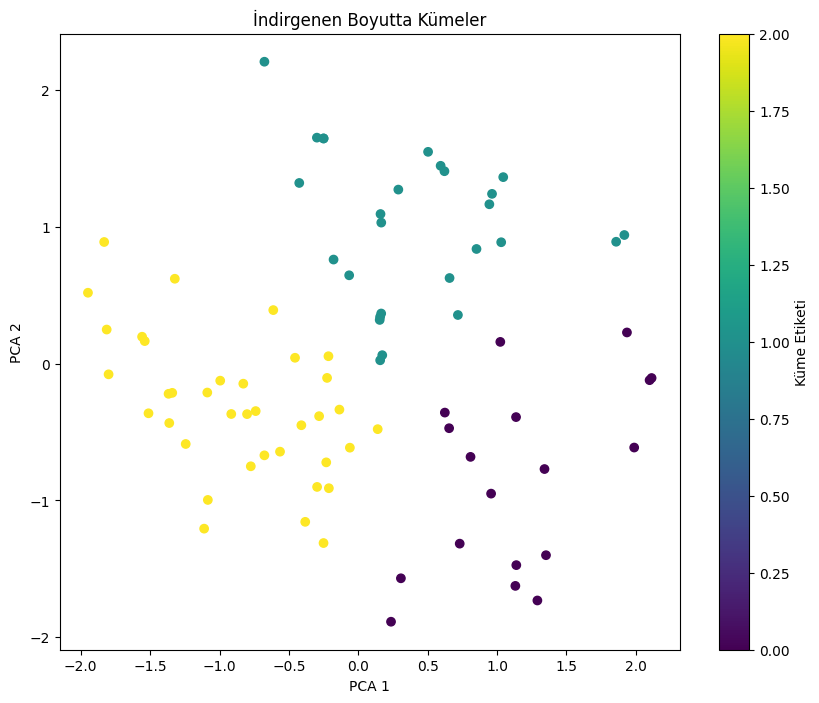

Cluster 1 centroid in original feature space:
[ 0.37860861  0.15162549  0.2990865   0.12276249  0.04791691  0.01191097
  0.04791691  0.44121146  0.4358685   0.06309215  0.12092471  0.13182316
  0.26064266  0.34538129  0.09536198  0.0458662   0.21109102  0.21121519
  0.40904976  0.11615234  0.05249168  0.29514302  0.70485698  0.44579889
  0.36041544  0.19378567  0.3835759   0.6164241   0.46907264  0.47988504
  0.04791691  0.0031254   0.14141152  0.54595387  0.34153921 -0.0289046
  0.42369516  0.4242848   0.40708639  0.33426156  0.48736034  0.15861346
  0.48691499  0.41688401  0.42584956  0.25090022  0.32150804  0.468811
  0.45930434  0.21036252  0.27475667  0.37722682  0.39316422  0.26311624
  0.55312105]

Cluster 2 centroid in original feature space:
[ 0.16412793  0.70605013  0.05219929  0.07942044 -0.00179779  0.00746813
 -0.00179779  0.14543196  0.81776825  0.03112945  0.0215763   0.08559721
  0.09862378  0.18459121  0.6135028  -0.00389129  0.08525376  0.33760186
  0.55590836 -0.0018

In [144]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'merged_results' is your DataFrame
categorical_columns = merged_results.columns[1:10]  # Adjust column indices as needed
onehot_encoder = OneHotEncoder()
categorical_data_encoded_sparse = onehot_encoder.fit_transform(merged_results[categorical_columns])
categorical_data_encoded = categorical_data_encoded_sparse.toarray()

# Normalize score data
score_columns = merged_results.columns[10:29]  # Adjust column indices as needed
scaler = MinMaxScaler()
score_data_normalized = scaler.fit_transform(merged_results[score_columns])

# Impute numerical data using the median
num_imputer = SimpleImputer(strategy='median')
score_data_imputed = num_imputer.fit_transform(score_data_normalized)

# For categorical data, if you have missing values, use the most frequent strategy
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_data_imputed = cat_imputer.fit_transform(categorical_data_encoded)

# Combine the imputed categorical and score data
combined_data = np.concatenate((categorical_data_imputed, score_data_imputed), axis=1)

# Assuming K is the chosen number of clusters
# kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(combined_data)

# Clear the current figure to refresh the plot
plt.clf()

from sklearn.decomposition import PCA

# Reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(combined_data)

# Fit KMeans on the reduced data
optimal_k = 3  

kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(reduced_data)

# Visualize the clusters in the reduced dimension
plt.figure(figsize=(10, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('İndirgenen Boyutta Kümeler')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Küme Etiketi')
plt.show()

# Assuming you have fitted the KMeans model on the original combined_data
centroids = kmeans.cluster_centers_

# If you used PCA, transform centroids back to the original space to interpret them
if 'pca' in locals():  # Check if PCA was performed
    centroids_original_space = pca.inverse_transform(centroids)
else:
    centroids_original_space = centroids

# Now, centroids_original_space contains the centroids in the space of your original features
# You can examine these to understand what characterizes each cluster
# For example, print the centroid values (you might want to map them back to original feature names)
for i, centroid in enumerate(centroids_original_space):
    print(f"Cluster {i+1} centroid in original feature space:\n{centroid}\n")


In [145]:
# Assuming 'kmeans.labels_' contains your cluster labels
merged_results['Cluster'] = kmeans.labels_

# List of your original categorical columns before one-hot encoding
original_categorical_columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9']  # Adjust as per your dataset

# Analyze the distribution of each categorical variable within each cluster
for column in original_categorical_columns:
    print(f"Distribution of {column} within each cluster:")
    for cluster in range(optimal_k):
        print(f"\nCluster {cluster+1}:")
        distribution = merged_results[merged_results['Cluster'] == cluster][column].value_counts(normalize=True) * 100
        print(distribution.to_string())
    print("\n" + "-"*50 + "\n")

Distribution of 1 within each cluster:

Cluster 1:
1
1    72.222222
0    27.777778

Cluster 2:
1
1    70.37037
0    29.62963

Cluster 3:
1
1    59.459459
0    40.540541

--------------------------------------------------

Distribution of 2 within each cluster:

Cluster 1:
2
0.0    47.058824
2.0    29.411765
3.0    11.764706
1.0    11.764706

Cluster 2:
2
1.0    77.777778
0.0    14.814815
3.0     3.703704
2.0     3.703704

Cluster 3:
2
2.0    78.378378
3.0    13.513514
0.0     8.108108

--------------------------------------------------

Distribution of 3 within each cluster:

Cluster 1:
3
3.0    52.941176
2.0    41.176471
1.0     5.882353

Cluster 2:
3
3.0    69.230769
2.0    30.769231

Cluster 3:
3
3.0    58.333333
2.0    36.111111
0.0     5.555556

--------------------------------------------------

Distribution of 4 within each cluster:

Cluster 1:
4
3.0    35.294118
4.0    29.411765
1.0    17.647059
2.0    11.764706
5.0     5.882353

Cluster 2:
4
5.0    66.666667
4.0    18.518519
2

In [146]:
# Define the labels for each question from 47 to 56
question_labels = {
    "47": "Yaşadığınız sosyal baskı düzeyinde bir değişiklik oldu mu?",
    "48": "Türklerle ilişkilerinizde hissettiğiniz baskıda bir değişiklik oldu mu?",
    "49": "Kamu hizmetlerine erişimdeki zorluklar zamanla nasıl değişti?",
    "50": "İş bulma ve çalışma koşullarıyla ilgili zorluklar nasıl değişti?",
    "51": "Eğitim fırsatlarına erişimdeki zorluklar ve baskılar zamanla nasıl değişti?",
    "52": "Sağlık hizmetlerine erişimde yaşadığınız zorluklar nasıl değişti?",
    "53": "Konut ve barınma koşullarıyla ilgili yaşadığınız baskı nasıl değişti?",
    "54": "Sosyal hizmetlere ve destek programlarına erişimdeki zorluklar nasıl değişti?",
    "55": "Ayrımcılık ve önyargıyla karşılaşma sıklığınız nasıl değişti?",
    "56": "Geleceğe dair beklentilerinizde bir değişiklik oldu mu?"
}

# Define the score labels common to questions 47 through 56
score_labels = {
    "1": "Daha İyi",
    "2": "İyi",
    "3": "Orta",
    "4": "Kötü",
    "5": "Daha Kötü"
}

# Iterate over each question and calculate the statistics for each score
for question, question_text in question_labels.items():
    print(f"\n{question}. {question_text}")
    counts = merged_results[question].value_counts()
    percentages = counts / counts.sum() * 100
    for score, score_text in score_labels.items():
        print(f"{score_text}: {counts.get(int(score), 0)} responses, {round(percentages.get(int(score), 0), 2)}%")


47. Yaşadığınız sosyal baskı düzeyinde bir değişiklik oldu mu?
Daha İyi: 15 responses, 18.75%
İyi: 14 responses, 17.5%
Orta: 31 responses, 38.75%
Kötü: 11 responses, 13.75%
Daha Kötü: 9 responses, 11.25%

48. Türklerle ilişkilerinizde hissettiğiniz baskıda bir değişiklik oldu mu?
Daha İyi: 25 responses, 31.25%
İyi: 22 responses, 27.5%
Orta: 18 responses, 22.5%
Kötü: 6 responses, 7.5%
Daha Kötü: 9 responses, 11.25%

49. Kamu hizmetlerine erişimdeki zorluklar zamanla nasıl değişti?
Daha İyi: 16 responses, 20.25%
İyi: 18 responses, 22.78%
Orta: 27 responses, 34.18%
Kötü: 6 responses, 7.59%
Daha Kötü: 12 responses, 15.19%

50. İş bulma ve çalışma koşullarıyla ilgili zorluklar nasıl değişti?
Daha İyi: 31 responses, 41.33%
İyi: 10 responses, 13.33%
Orta: 18 responses, 24.0%
Kötü: 10 responses, 13.33%
Daha Kötü: 6 responses, 8.0%

51. Eğitim fırsatlarına erişimdeki zorluklar ve baskılar zamanla nasıl değişti?
Daha İyi: 25 responses, 32.89%
İyi: 24 responses, 31.58%
Orta: 14 responses, 18.42%